In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [16]:
URL = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(URL, sep='\t')

#5. Измените тип переменной item_price c с помощью лямбды функции
df['item_price'] = df['item_price'].apply(lambda x: x.replace('$', '')).astype('float')



In [17]:
#Вывести: кол-во наблюдений в датасете
num_of_rows = len(df.axes[0])
print("Number of rows: ", num_of_rows)

Number of rows:  4622


In [18]:
#3. Определить самую частую позицию (item) в заказе
print("Самая частая позиция до разделения: ", df.item_name.mode()[0])

Самая частая позиция до разделения:  Chicken Bowl


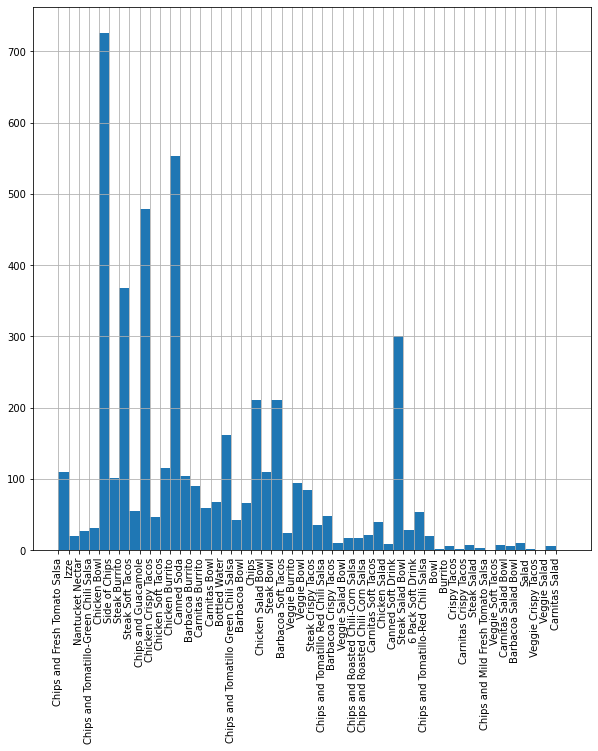

In [20]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df['item_name'].hist(ax = ax, xrot = 90, bins=50, range=(0,50))

In [21]:
#приведем поле item_name к атамарности 

#price of chips pack
chips_price = df[df.item_name == 'Chips'][df.quantity == 1]
chips = chips_price['item_price'].mode().values

#for dividing chips with souces 
for row, index in df[df.item_name.str.contains('and')].iterrows():
      item1, item2 = index[2].split(" and ")
      df = df.append(index, ignore_index=True)
      df.loc[df.index == row, 'item_name'] = item2
      price_before = index[4]
      quan = index[1]
      df.loc[df.index == row, 'item_price'] = (price_before - chips*quan)
      df.update(df.item_name[df.item_name.eq(index[2])][df.order_id.eq(index[0])].fillna(item1))
      df.loc[df.order_id.eq(index[0]) & df.item_name.eq(index[2]), 'item_name'] = item1
      last = df.tail(1).index.start
      df.loc[(df.item_name.eq('Chips') & df.order_id.eq(index[0])) & (df.index == last), 'item_price'] = (quan*chips)

print("Самая частая позиция после разделения: ", df.item_name.mode()[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Самая частая позиция после разделения:  Chips


2. Вывести названия столбцов

In [22]:
columns_names = df.columns.values
print(columns_names)

['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


4. Построить гистрограмму частоты заказов по позициям (item )

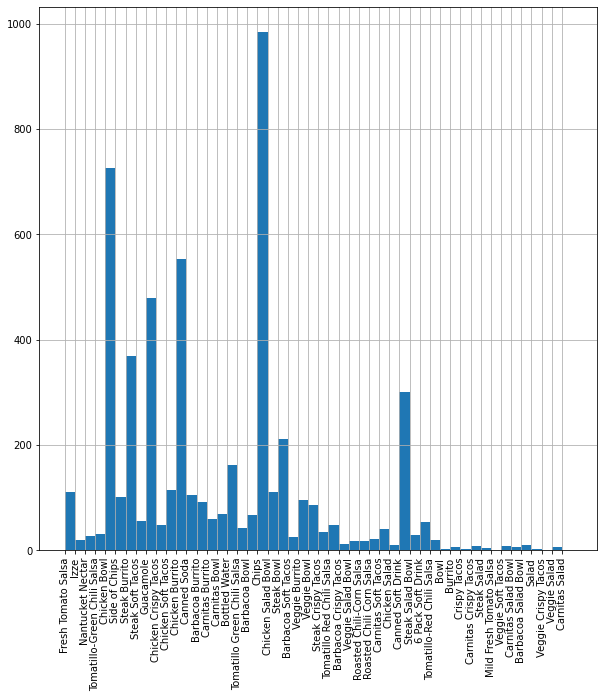

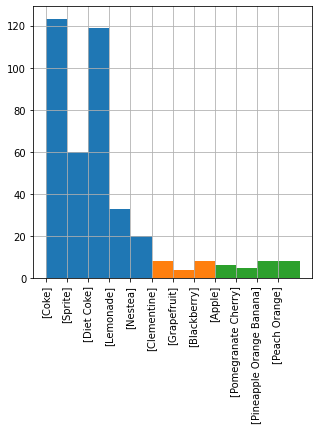

In [31]:
# графики построены с учетом приведения к атомарности item_name

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df['item_name'].hist(ax = ax, xrot = 90, bins=50, range=(0,50))


sub_of_Drink = df[df.item_name.str.contains('Drink')]
fig = plt.figure(figsize = (5,5))
bx = fig.gca()
sub_of_Drink['choice_description'].hist(ax=bx, bins = 5, xrot = 90, range=(0,5))

sub_of_Izze = df[df.item_name.str.contains('Izze')]
sub_of_Izze['choice_description'].hist(ax=bx, bins = 3, range =(5,8),  xrot = 90)

sub_of_Nectar = df[df.item_name.str.contains('Nectar')]
sub_of_Nectar['choice_description'].hist(ax=bx, bins=4, range=(8,12), xrot = 90)




6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)



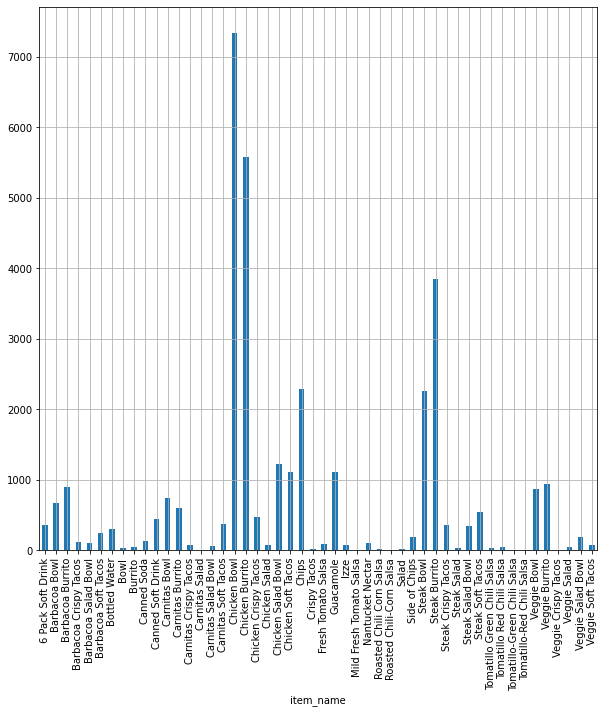

In [32]:
df.head()
fig = plt.figure(figsize = (10,10))
bx = fig.gca()

df.groupby('item_name').item_price.sum().plot.bar(ax=bx, grid=True)




7. Средняя сумма заказа? (минимум 2 способа)

In [33]:
# first method

print('mean sum (1st) = ' ,df.groupby(['order_id'])['item_price'].sum().mean())

# 2nd method

sum_by_order_id = df.groupby(['order_id'])['item_price'].sum()
number_of_orders = df['order_id'].nunique()
mean_sum = sum_by_order_id.sum()/number_of_orders
print('mean sum (2nd) = ', mean_sum)


mean sum (1st) =  18.81142857142869
mean sum (2nd) =  18.811428571428568


8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [42]:
df.groupby('order_id').nunique().item_name.agg(['mean', 'min', 'max', 'median'])

mean      2.7241
min       1.0000
max       9.0000
median    3.0000
Name: item_name, dtype: float64

9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [47]:
#steaks statistic

steak_orders = df[df.item_name.str.contains('Steak')] 
steak_orders.groupby('item_name')['quantity', 'item_price'].describe()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

In [60]:
#Sauces statistic

sauce = df[(df.choice_description.str.contains('Hot|Mild|Medium', na = False)) & (df.item_name.str.contains('Steak'))]
sauce_Mild = sauce[sauce.choice_description.str.contains('Mild')]
sauce_Hot = sauce[sauce.choice_description.str.contains('Hot')]
sauce_Medium = sauce[sauce.choice_description.str.contains('Medium')]

sauce_Mild.groupby('choice_description')['quantity', 'item_price'].describe()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


quantity       ... item_price       
                                                      count mean  ...        75%    max
choice_description                                                ...                  
[Fresh Tomato (Mild), [Black Beans, Guacamole, ...      1.0  1.0  ...      11.08  11.08
[Fresh Tomato (Mild), [Guacamole, Lettuce, Pint...      2.0  1.0  ...      11.08  11.08
[Fresh Tomato (Mild), [Lettuce, Black Beans, Ri...      1.0  1.0  ...       8.69   8.69
[Fresh Tomato (Mild), [Lettuce, Black Beans, Ri...      1.0  1.0  ...       8.69   8.69
[Fresh Tomato (Mild), [Lettuce, Cheese]]                1.0  1.0  ...       8.69   8.69
...                                                     ...  ...  ...        ...    ...
[[Roasted Chili Corn Salsa (Medium), Fresh Toma...      1.0  1.0  ...      11.48  11.48
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      2.0  1.0  ...       8.99   8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  1.0  ...       8.99   8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  1.0  ...       8.99   8.99
[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato...      1.0  1.0  ...       8.99   8.99

[72 rows x 16 columns]

In [61]:
sauce_Hot.groupby('choice_description')['quantity', 'item_price'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


quantity  ... item_price
                                                      count  ...        max
choice_description                                           ...           
[Rice, Tomatillo-Red Chili Salsa (Hot)]                 2.0  ...       8.99
[Tomatillo Red Chili (Hot), [Lettuce, Black Bea...      1.0  ...       8.69
[Tomatillo Red Chili (Hot), [Lettuce, Rice, Sou...      1.0  ...       8.69
[Tomatillo-Red Chili Salsa (Hot), Lettuce]              1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), Rice]                 1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      1.0  ...      11.48
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      3.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      2.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      2.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Black Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Cheese, Lett...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Cheese, Sour...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Guacamole, L...      1.0  ...      11.48
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans,...      3.0  ...      17.98
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans,...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans,...      2.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Black ...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese...      1.0  ...      11.48
[Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese...      1.0  ...      11.48
[Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese...      6.0  ...      17.98
[Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese...      2.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese]]       1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajita...      1.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajita...      2.0  ...       8.99
[Tomatillo-Red Chili Salsa (Hot), [Rice, Pinto ...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Roasted Chili Corn...      3.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Green Ch...      2.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Green Ch...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Green Ch...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...      11.48
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...      11.48
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...      11.48
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...      11.48
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      1.0  ...       8.99
[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...      2.0  ...       8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      2.0  ...       8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  ...       8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  ...       8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      5.0  ...       8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  ...       8.99
[[Roasted Chili Corn Salsa (Medium), Tomatillo-...      1.0  ...       8.99
[[Roasted Chili Corn Sa

In [62]:
sauce_Medium.groupby('choice_description')['quantity', 'item_price'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


quantity       ... item_price       
                                                      count mean  ...        75%    max
choice_description                                                ...                  
[Roasted Chili Corn (Medium), [Sour Cream, Chee...      1.0  1.0  ...       8.69   8.69
[Roasted Chili Corn Salsa (Medium), Lettuce]            2.0  1.0  ...       8.99   8.99
[Roasted Chili Corn Salsa (Medium), Rice]               1.0  1.0  ...       8.99   8.99
[Roasted Chili Corn Salsa (Medium), [Black Bean...      1.0  1.0  ...       8.99   8.99
[Roasted Chili Corn Salsa (Medium), [Black Bean...      1.0  1.0  ...       8.99   8.99
...                                                     ...  ...  ...        ...    ...
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  2.0  ...      22.96  22.96
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.0  ...       8.99   8.99
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.0  ...       8.99   8.99
[[Tomatillo-Green Chili Salsa (Medium), Roasted...      1.0  1.0  ...      11.48  11.48
[[Tomatillo-Green Chili Salsa (Medium), Tomatil...      1.0  2.0  ...      17.98  17.98

[81 rows x 16 columns]

10. Добавить новый столбец цен на каждую позицию в заказе в рублях.


In [64]:
df['Ruble'] = round(df.item_price * 72.94, 2)
df.head()

,order_id,quantity,item_name,choice_description,item_price,Ruble
0,1,1,Fresh Tomato Salsa,NaN,0.24,17.51
1,1,1,Izze,[Clementine],3.39,247.27
2,1,1,Nantucket Nectar,[Apple],3.39,247.27
3,1,1,Tomatillo-Green Chili Salsa,NaN,0.24,17.51
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1238.52


11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [67]:
#сгруппировать заказы
df.groupby('order_id').agg({ 
    'quantity': np.sum,
    'item_name': lambda x: ", ".join(x),
    'item_price': np.sum,
    'Ruble':np.sum
})

,quantity,item_name,item_price,Ruble
order_id,,,,
1,6,"Fresh Tomato Salsa, Izze, Nantucket Nectar, To...",11.56,843.20
2,2,Chicken Bowl,16.98,1238.52
3,2,"Chicken Bowl, Side of Chips",12.67,924.15
4,2,"Steak Burrito, Steak Soft Tacos",21.00,1531.74
5,3,"Steak Burrito, Guacamole, Chips",13.70,999.28
...,...,...,...,...
1830,2,"Steak Burrito, Veggie Burrito",23.00,1677.62
1831,3,"Carnitas Bowl, Chips, Bottled Water",12.90,940.93
1832,3,"Chicken Soft Tacos, Guacamole, Chips",13.20,962.80


In [72]:
#сгруппировать по остроте соуса
#Medium
sauce_Medium.groupby('item_name').agg({
    'quantity': np.sum,
    'item_price': np.sum
})

,quantity,item_price
item_name,,
Steak Bowl,33,310.71
Steak Burrito,73,678.38
Steak Crispy Tacos,3,26.97
Steak Soft Tacos,10,94.88


In [73]:
#Hot
sauce_Hot.groupby('item_name').agg({
    'quantity': np.sum,
    'item_price': np.sum
})

,quantity,item_price
item_name,,
Steak Bowl,21,198.75
Steak Burrito,50,466.33
Steak Crispy Tacos,5,44.95
Steak Salad,2,17.98
Steak Soft Tacos,8,74.41


In [74]:
#Mild
sauce_Mild.groupby('item_name').agg({
    'quantity': np.sum,
    'item_price': np.sum
})

,quantity,item_price
item_name,,
Steak Bowl,30,280.75
Steak Burrito,70,678.49
Steak Crispy Tacos,3,26.67
Steak Salad,1,8.99
Steak Soft Tacos,5,52.42


In [75]:
#steaks
steak_orders.groupby('item_name').agg({
    'quantity': np.sum,
    'item_price': np.sum
})

,quantity,item_price
item_name,,
Steak Bowl,221,2260.19
Steak Burrito,386,3851.43
Steak Crispy Tacos,36,357.34
Steak Salad,4,35.66
Steak Salad Bowl,31,343.59
Steak Soft Tacos,56,536.05


12. Определить цену по каждой позиции в отдельности.


In [78]:
df['price_per_one_item'] = round(df.item_price/df.quantity, 2)
df.head(5)

,order_id,quantity,item_name,choice_description,item_price,Ruble,price_per_one_item
0,1,1,Fresh Tomato Salsa,NaN,0.24,17.51,0.24
1,1,1,Izze,[Clementine],3.39,247.27,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,247.27,3.39
3,1,1,Tomatillo-Green Chili Salsa,NaN,0.24,17.51,0.24
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1238.52,8.49


In [80]:
df.groupby('item_name').agg({
    'price_per_one_item': lambda x: x.unique()
})

,price_per_one_item
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4


#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 
